<center><h3>Introduction</h3></center>
    
The following will be a case where a neural network with one hidden layer is used to predict on a dataset for a classification problem to determine whether it is 0 or 1.

**Generate a synthetic dataset**
    
- Outputs 0 or 1 for binary classification. 
- Inputs should have a size of 2 parameters
- One hidden layer has a size of 4 - purely a design choice

In [14]:
import numpy as np
import copy

def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

X,Y = load_planar_dataset()

print ('X has parameters:',X.shape[0], 'and entries:',X.shape[1])
print ('Y has parameters:',Y.shape[0], 'and entries:',Y.shape[1])
unique_y = np.unique(Y)
print('The unique values in  Y are:',unique_y)

X has parameters: 2 and entries: 400
Y has parameters: 1 and entries: 400
The unique values in  Y are: [0 1]


<h4>Architecture</h4>
    
- Each input has two features
- There are 4 hidden units in the first hidden layer which is simply a deisgn choice
- One output layer
    
<div style="text-align: center;">
    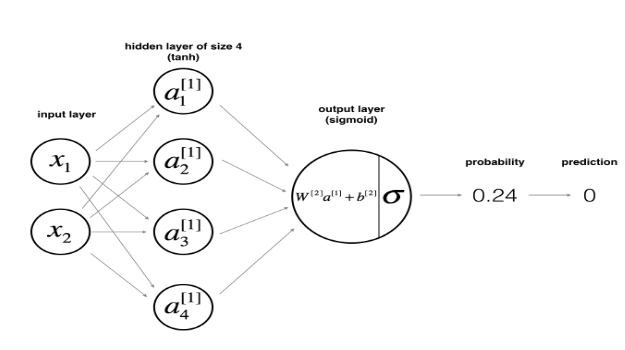
</div>

<h4>Get the size of the layers of the Neural Network<h/4>

In [21]:
def layer_sizes(X, Y):
    # input layer size
    n_x=X.shape[0]
    # hidden layer size is a design choice of 4
    n_h=4
    # output layer size
    n_y=Y.shape[0]
    # size of all layers
    return (n_x, n_h, n_y)


n_x, n_h, n_y = layer_sizes(X, Y)
print('For planar dataset the size of input/hidden/output layers are:',layer_sizes(X,Y))

For planar dataset the size of input/hidden/output layers are: (2, 4, 1)


<h4>Initialize parameters for W and b<h/4>

In [25]:
def initialize_parameters(n_x, n_h, n_y):
    # Hidden Layer, Input Layer
    W1=np.random.randn(n_h,n_x)*0.01
    # Hidden layer, 1
    b1=np.zeros((n_h,1))
    # output Layer, hidden Layer
    W2=np.random.randn(n_y, n_h)*0.01
    # output Layer, 1
    b2=np.zeros((n_y,1))
    # Save in a dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

parameters = initialize_parameters(n_x, n_h, n_y)
print(parameters)

{'W1': array([[-0.004382  ,  0.00185536],
       [ 0.00394428,  0.00725523],
       [ 0.01495885,  0.00675454],
       [ 0.00599213, -0.01470237]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 0.00606404,  0.02293718, -0.00830011, -0.0101952 ]]), 'b2': array([[0.]])}


<h4>Forward propagation<h/4>

In [30]:
def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

def forward_propagation(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Linear output for layer#1
    Z1 = np.dot(W1,X) +b1
    # Activated output for layer#1
    A1 = np.tanh(Z1)
    # Linear output for layer#2
    Z2 = np.dot(W2,A1) + b2
    # Activated output for layer#1
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    # Save results in dictionary
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

A2, cache = forward_propagation(X, parameters)

<h4>Compute the cost between predicted and actual values using the cross entropy equation which is preferred for binary classification<h/4>

In [31]:
def compute_cost(A2, Y):
    m = Y.shape[1] 
    # cross-entropy is used as loss function
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    return cost

cost = compute_cost(A2,Y)

<h4>Perform backwards propagation using the equations below<h/4>

<div style="text-align: center;">
    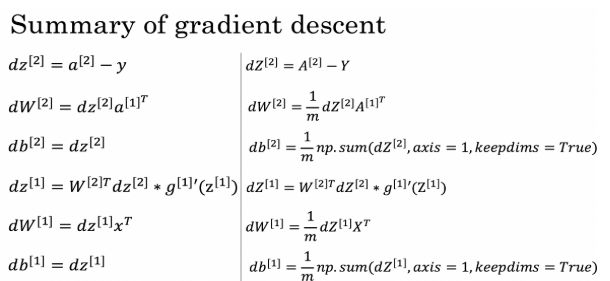
</div>

In [36]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    
    # First parameters from the dictionary parameters
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Retrieve activated outputs A1 and A2 from dictionary cache
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Derivative of loss w.r.t. output of second layer
    dZ2 = A2 - Y
    # Derivative of loss w.r.t. W2
    dW2 = np.dot(dZ2, A1.T) / m
    # Derivative of loss w.r.t. b2
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m
    # Derivative of loss w.r.t. output of first layer
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(A1, 2))
    # Derivative of loss w.r.t. W1
    dW1 = np.dot(dZ1, X.T) / m
    # Derivative of loss w.r.t. b1
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m
 
    # Save gradients for each parameters in grads dictionary
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

grads = backward_propagation(parameters, cache, X, Y)

<h4>Update the parameters using the gradients obtained<h/4>

In [37]:
def update_parameters(parameters, grads, learning_rate = 1.2):

    # Retrieve parameters
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve gradients for each parameter
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    # Add new parameter values to parameters dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters

parameters = update_parameters(parameters, grads, learning_rate = 1.2)

**Set the entire function together**
    
- Print the cost to every 1000 iterations to check if it is lowering
- Return the final parameters

In [44]:
def nn_model(X, Y, n_h, num_iterations = 10000):
    
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate=1.2)
                
        # Print the cost every 1000 iterations
        if i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

nn_model(X, Y, n_h, num_iterations = 10000)

Cost after iteration 0: 0.693168
Cost after iteration 1000: 0.281401
Cost after iteration 2000: 0.268997
Cost after iteration 3000: 0.261991
Cost after iteration 4000: 0.257424
Cost after iteration 5000: 0.254272
Cost after iteration 6000: 0.251993
Cost after iteration 7000: 0.250280
Cost after iteration 8000: 0.248952
Cost after iteration 9000: 0.247895


{'W1': array([[ 10.83289328,  12.6436239 ],
        [ -0.60905577,  -2.12562766],
        [ 10.99130558, -13.70411316],
        [ -0.04485189,  -8.24175029]]),
 'b1': array([[ 0.11712535],
        [-4.13242989],
        [ 0.09746609],
        [-0.04728456]]),
 'W2': array([[ -6.37462333,   0.67626038,   6.24333227, -11.18592049]]),
 'b2': array([[0.31347796]])}

<h4>Make predictions using the newly updated parameters<h/4>

In [46]:
def predict(parameters, X):
    # Get the predicted output
    A2, cache = forward_propagation(X, parameters)
    # For binary classification purposes, when greater than 0.5> consider that as 1
    predictions = (A2 > 0.5).astype(int)
    return predictions

predictions = predict(parameters, X)

<h4> Calculate the accuracy between the actual and predicted values for Y<h/4>

In [48]:
def calculate_accuracy(predictions, Y):
    # Ensure predictions and Y are the same shape
    predictions = predictions.flatten()
    Y = Y.flatten()
    # Calculate accuracy
    accuracy = np.mean(predictions == Y) * 100
    return accuracy

calculate_accuracy(predictions, Y)

45.5

**Conclusion**
    
While the prediction accuracy is low, a neural network has been successfully developed to predict for a binary classification. Further modifications of the hyperparameters can result in better predictions.